# Final Project 

## Importing Necessary Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn import model_selection, metrics
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import DBSCAN, KMeans
from collections import Counter

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

%matplotlib inline

Using TensorFlow backend.


# Executive Summary

Using the set of data containing the different amount of ingredients used to make the different bottles of wine, we will perform an analysis to try to understand the different associations or factors related to winning a wine award. 

I begin with a exploratory data analysis, which will allow me to clean and make the data convenient for proper analysis. At this point, i also checked if there are any missing values and in addition, i created a new column "Award", as a outcome for analysis. 

Next i moved on to do a visual analysis, which will show me the correlations between certain factors and perhaps provide some intuition as to which factors are more useful for analysis. I also looked at the distribution of my data in this step.

Lastly, i created a train test split set of data. I fit the train into various models such as the Logistic Regression model, KNN and clustering. Some of this models will be able to predict whether a certain wine would win an award. My models will be scored across various metrics, including accuracy, precision, recall, and the ROC curve.


# Problem Statement

## What am i trying to find out?

Making use of the dataset filled with the samples of the Portugese "Vinho Verde" wine, i will be creating models to predict, if a certain wine of its own characteristics such as (fixed acidity, citric acid etc etc) will win an award. While creating the model for predictions, we will also find primary variables/factors that increases the chances of a wine winning an award. 

## What is my dataset about?

This dataset is related to the red variants of the Portuguese "Vinho Verde" wine. "Vinho Verde" is the biggest DOC(Denominazione di Origine Controllata) of Portugal, up in the cool, rainy, verdant north west. The inputs include objective tests such as PH values and the output is based on sensory data (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality between 0 (very bad) and 10 (very excellent).

## A data dictionary has been created for this data for better understanding of each variable below:

| Column | Type | Description | Key |
| --- | --- | --- | --- |
| Fixed Acidity | Float |  Most acids involved with wine | - 
| Volatile Acidity | Float | The amount of acetic acid in wine | -
| Citric Acid | Float | Citric acid adds 'freshness' and flavor to wines | -
| Residual Sugar | Float | Sugar remaining after fermentation stops | -
| Cholorides | Float | The amount of salt in the wine | -
| Free Sulfur Dioxide | Float | Prevents microbial growth & the oxidation of wine | -
| Total Sulfur Dioxide | Float | Amount of free and bound forms of S02 | -
| Density | Float | Depending on the percent alcohol and sugar content | -
| PH | Float | how acidic or basic a wine is |  0 (very acidic) to 14 (very basic)
| Sulphates | Float | Wine additive | -
| Alcohol | Float | Percent alcohol content of the wine | -
| Quality | Int | Grade | 0(Very bad) to 10 (Very good)
| Award | Binary | Wine awarded? | 0 = No, 1 = Yes

# Assumptions and Risks/Limitations

## Assumptions:

1) Data is accurately recorded

## Risks/limations:

1) Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.), there may affect the accuracy of the analysis. 

2) Data does not contain all types of red wines in this world. 

3) In order to predict how to win an award, "award" column was self created, therefore may affect accuracy of prediction as well.

4) The quality is not balanced (e.g. there are munch more normal wines than excellent or poor ones).

5) I am not the one who collected the data so i have no way of verifying the data

# Hypothesis

Null Hypothesis: There is no relationship between the ingredients used to produce a certain wine and winning an award. 

Alternative Hypothesis: There is a relationship between the percentage of alchohol in a bottle of wine and winning an award.

# Exploratory Data Analysis

In [6]:
wine_data = pd.read_csv('/Users/Jarence/desktop/ga-data-science-course/projects/final-projects/winequality-red.csv',sep=';')

In [7]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
wine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

## Creating a new column --> "Award" to state whether an award was received or not. 
The assumptions are as followed: If quality of wine is more than or equal to 7, it has been awarded, else it was not awarded. 

In [12]:
def quality(x):
    if x >= 7:
        return 1
    else:
        return 0

wine_data["Award"] = wine_data["quality"].apply(quality)

In [10]:
wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Award
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


In [11]:
wine_data.shape

(1599, 13)

After creating the new column "Award", there are 1599 rows and 13 columns(Variables)

In [32]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Award
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


## Any missing values?

In [33]:
wine_data.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
Award                   1599
dtype: int64

In [34]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
Award                   1599 non-null int64
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


Seems like there is no missing values.

## My data's distribution

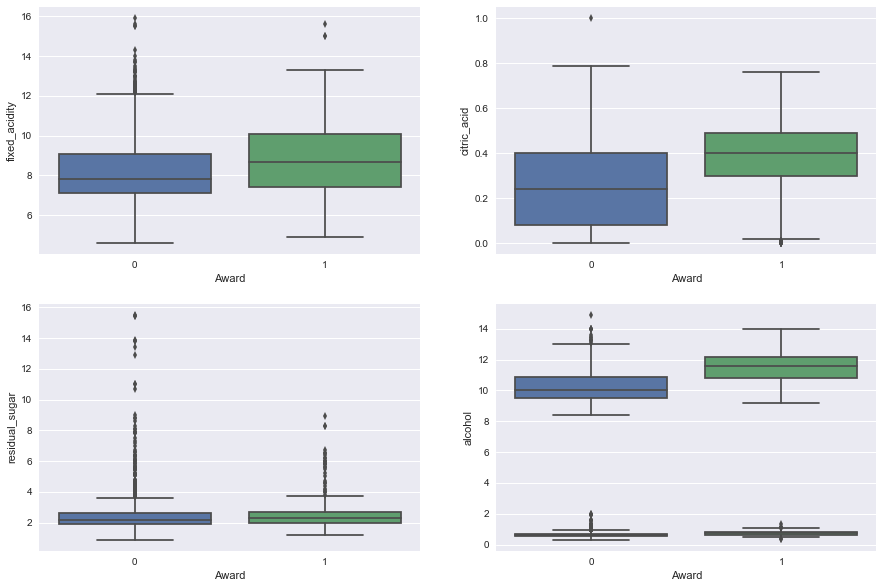

In [38]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
sns.boxplot(x="Award", y="fixed_acidity", data=wine_data, ax=ax[0,0])
sns.boxplot(x="Award", y="citric_acid", data=wine_data, ax=ax[0,1])
sns.boxplot(x="Award", y="residual_sugar", data=wine_data, ax=ax[1,0])
sns.boxplot(x="Award", y="sulphates", data=wine_data, ax=ax[1,1])
sns.boxplot(x="Award", y="alcohol", data=wine_data, ax=ax[1,1])

<function matplotlib.pyplot.show>

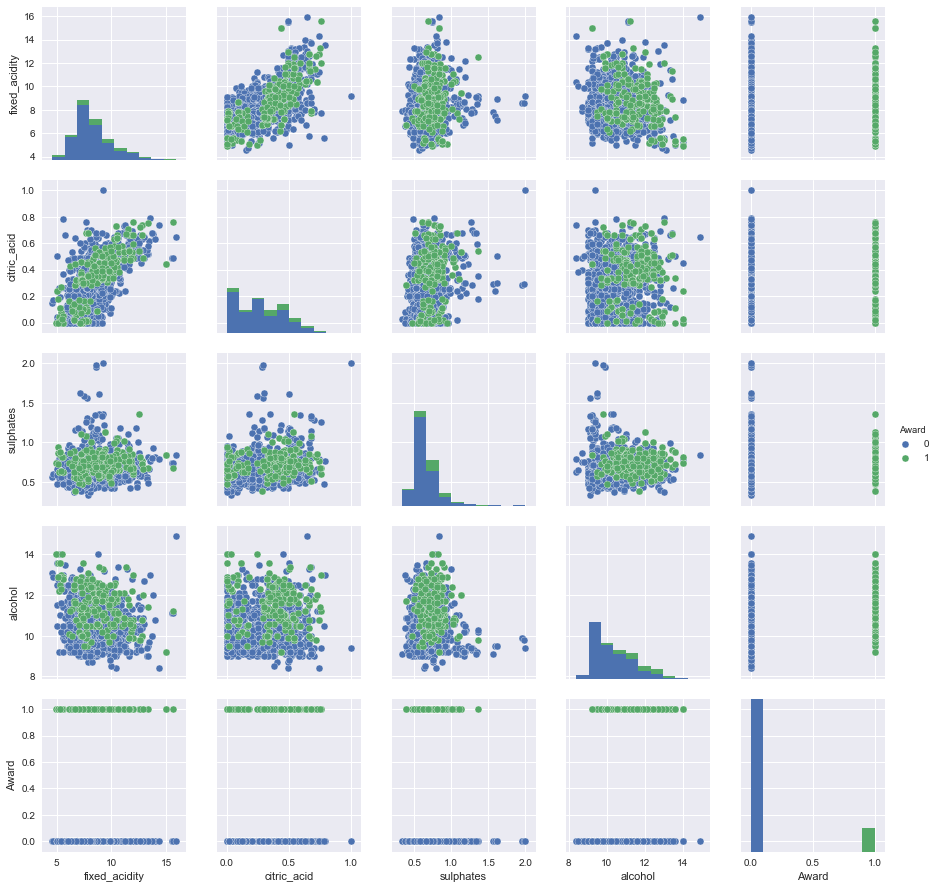

In [39]:
factor = wine_data[["fixed_acidity", "citric_acid", "sulphates", "alcohol","Award"]]
sns.pairplot(factor, hue='Award')
plt.show  

In [40]:
wine_data.var() 

fixed_acidity              3.031416
volatile acidity           0.032062
citric_acid                0.037947
residual_sugar             1.987897
chlorides                  0.002215
free sulfur dioxide      109.414884
total sulfur dioxide    1082.102373
density                    0.000004
pH                         0.023835
sulphates                  0.028733
alcohol                    1.135647
quality                    0.652168
Award                      0.117366
dtype: float64

## Correlations

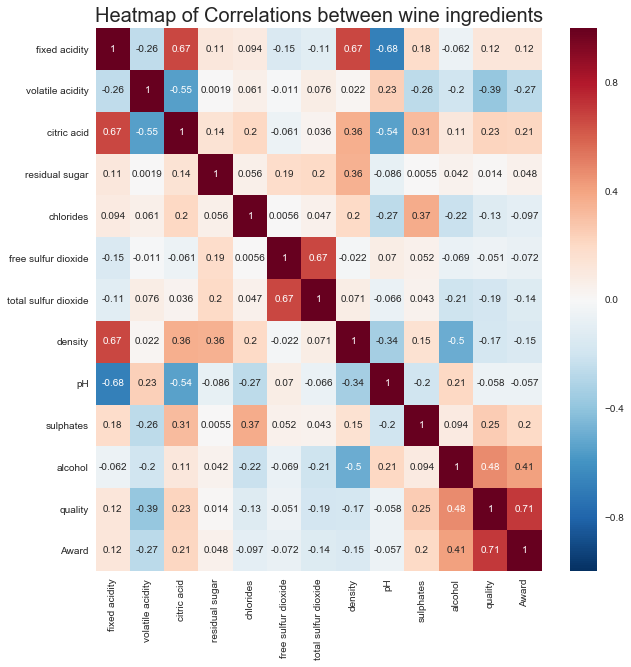

In [41]:
plt.figure()
fig, ax = plt.subplots(figsize=(10,10)) 
ingredients = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide","total sulfur dioxide", "density","pH","sulphates","alcohol","quality","Award"]
sns.heatmap(wine_data.corr(), xticklabels=ingredients, yticklabels=ingredients, annot = True)
plt.title("Heatmap of Correlations between wine ingredients",fontsize=20)
plt.show()

## Correlation between alchohol and Award

In [42]:
wine_data[["alcohol", "Award"]].corr()

,alcohol,Award
alcohol,1.000000,0.407315
Award,0.407315,1.000000


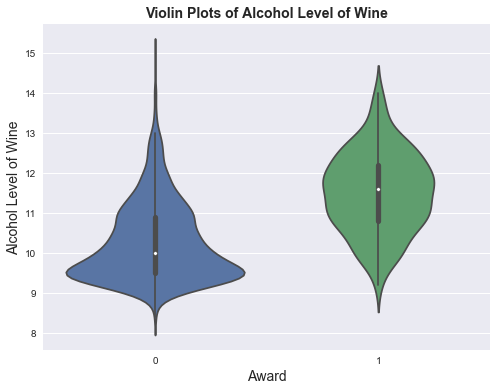

In [43]:
plt.figure(figsize=(8,6))
sns.violinplot("Award", "alcohol", split=True, data=wine_data) 
plt.xlabel("Award", fontsize=14)
plt.ylabel("Alcohol Level of Wine", fontsize=14)
plt.title("Violin Plots of Alcohol Level of Wine", fontsize=14, weight="bold")

## All ingredients against Award

In [44]:
wine_data.corr()["Award"]

fixed_acidity           0.120061
volatile acidity       -0.270712
citric_acid             0.214716
residual_sugar          0.047779
chlorides              -0.097308
free sulfur dioxide    -0.071747
total sulfur dioxide   -0.139517
density                -0.150460
pH                     -0.057283
sulphates               0.199485
alcohol                 0.407315
quality                 0.710196
Award                   1.000000
Name: Award, dtype: float64

It seems like alcohol level is the variable with the highest correlation score against winning an award. It is also safe to say that the higher the wine's alcohol level is, the higher the chance of the wine winning an award.

# Creating Train and Test Data for classification 

In [13]:
wine_data = wine_data.rename(columns={'fixed acidity': 'fixed_acidity', 'citric acid': 'citric_acid','residual sugar': 'residual_sugar'})

In [14]:
wine_data.head(1)

,fixed_acidity,volatile acidity,citric_acid,residual_sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Award
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


Stratify will be used to ensure that the splitted data, has equal amounts of 1s and 0s obtained from the column "Award".

In [45]:
factor_s = wine_data[["fixed_acidity", "citric_acid", "residual_sugar","sulphates","alcohol"]]
x= StandardScaler().fit_transform(factor_s)
y= wine_data["Award"]

x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,stratify=y, test_size=0.30, random_state=50)
x_train.shape, x_test.shape, y_train.shape, y_test.shape



((1119, 5), (480, 5), (1119,), (480,))

In [46]:
knn = KNeighborsClassifier(5).fit(x_train, y_train)

## Now we get to look at the accuracy score for predictions on the training and testing data

In [47]:
predictions_training = knn.predict(x_train)
metrics.accuracy_score(predictions_training, y_train)

0.91242180518319926

In [48]:
predictions_testing = knn.predict(x_test)
metrics.accuracy_score(predictions_testing, y_test) #check out baseline, i got alot of awarded anot, cus if 80% is awarded then my accuracy is also 80%

0.86041666666666672

# Creating a logistic regression model

In [49]:
lm = LogisticRegression().fit(x_train, y_train)

In [50]:
accuracy_score(y_train, lm.predict(x_train))

0.87310098302055406

In [51]:
accuracy_score(y_test, lm.predict(x_test))

0.87916666666666665

## Clustering

In [3]:
def set_colors(labels, colors='rgbykcm'):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

Counter({0: 1588, 3: 4, 1: 3, 2: 3, -1: 1})


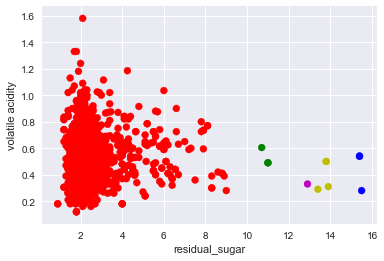

In [27]:
estimator = DBSCAN(eps=0.5, min_samples=3)
X = wine_data[["volatile acidity", "residual_sugar"]]
estimator.fit(X)
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(wine_data["residual_sugar"], wine_data["volatile acidity"], c=colors)
plt.xlabel("residual_sugar")
plt.ylabel("volatile acidity")
plt.show()

In [28]:
estimator2 = DBSCAN(eps=0.5, min_samples=3)
X = wine_data[["volatile acidity", "residual_sugar"]]
estimator.fit(X)

labels = estimator.labels_
print Counter(labels)
print metrics.silhouette_score(X, labels, metric='euclidean')

Counter({0: 1588, 3: 4, 1: 3, 2: 3, -1: 1})
0.85964507058


## Clustering with kmeans and other features this time

In [39]:
Y = StandardScaler().fit_transform(wine_data[["residual_sugar", "alcohol"]])
est = KMeans(3)
est.fit(Y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [33]:
wine_data["label"] = est.labels_
colors = set_colors(wine_data["label"])

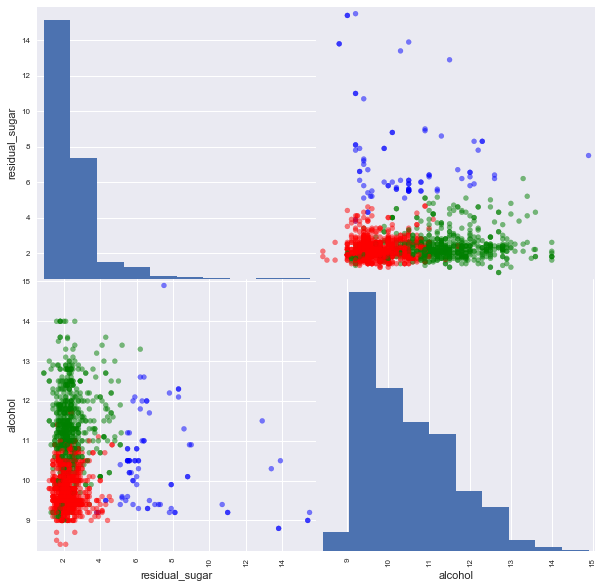

In [40]:
pd.scatter_matrix(wine_data[["residual_sugar", "alcohol"]], c=colors, figsize=(10,10), s=100)
plt.show()


We can see that when the clusters are grouped by residual_sugar and alcohol, three clusters are segregated clearly. This might mean something!